In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
import cv2
from glob import glob
from skimage.io import imread, imshow
import piexif

In [4]:
import os

In [35]:
# using os sets the \ for me -> windows
# using os / -> linux
basepath = os.path.join('..', 'train/')

In [36]:
print(basepath)

../train/


In [37]:
all_cervix_images = []

In [38]:
all_cervix_images

[]

In [39]:
for path in sorted(glob(basepath + "*")):
    # escape \
    cervix_type = path.split("/")[-1]
    cervix_images = sorted((glob(basepath + cervix_type + "/*")))
    all_cervix_images = all_cervix_images + cervix_images

In [41]:
all_cervix_images[:5]

['../train/Type_1/0.jpg',
 '../train/Type_1/10.jpg',
 '../train/Type_1/1013.jpg',
 '../train/Type_1/1014.jpg',
 '../train/Type_1/1019.jpg']

In [42]:
all_cervix_images = pd.DataFrame({'imagepath': all_cervix_images})

In [43]:
all_cervix_images.head()

,imagepath
0,../train/Type_1/0.jpg
1,../train/Type_1/10.jpg
2,../train/Type_1/1013.jpg
3,../train/Type_1/1014.jpg
4,../train/Type_1/1019.jpg


In [44]:
all_cervix_images['filetype'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)

In [45]:
all_cervix_images.head()

,imagepath,filetype
0,../train/Type_1/0.jpg,jpg
1,../train/Type_1/10.jpg,jpg
2,../train/Type_1/1013.jpg,jpg
3,../train/Type_1/1014.jpg,jpg
4,../train/Type_1/1019.jpg,jpg


In [46]:
all_cervix_images['type'] = all_cervix_images.apply(lambda row: row.imagepath.split("/")[-2], axis=1)

In [47]:
all_cervix_images.head()

,imagepath,filetype,type
0,../train/Type_1/0.jpg,jpg,Type_1
1,../train/Type_1/10.jpg,jpg,Type_1
2,../train/Type_1/1013.jpg,jpg,Type_1
3,../train/Type_1/1014.jpg,jpg,Type_1
4,../train/Type_1/1019.jpg,jpg,Type_1


In [48]:
from scipy import ndimage, misc

In [49]:
print('We have a total of {} images in the whole dataset'.format(all_cervix_images.shape[0]))

We have a total of 1480 images in the whole dataset


/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


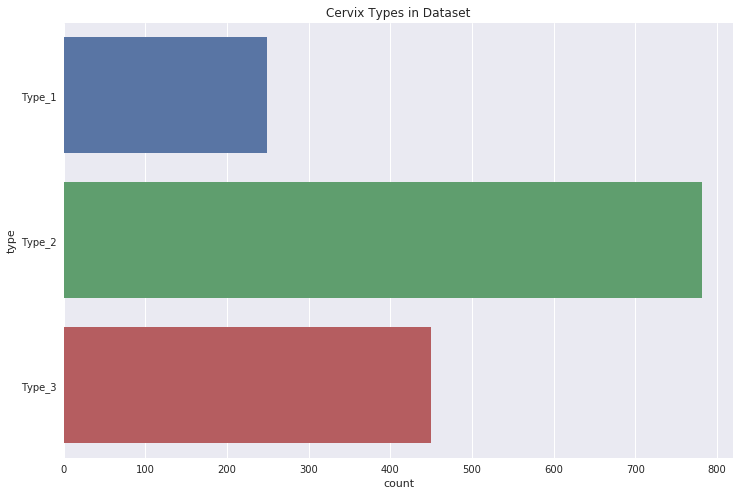

In [50]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_title('Cervix Types in Dataset')
sns.countplot(y='type',data=all_cervix_images, ax=ax)

In [51]:
print('Percantage of each type in the data:')
for c_type in ['Type_1', 'Type_2', 'Type_3']:
    print(c_type + ': ' + '{:.1f} %'.format(
        len(all_cervix_images[all_cervix_images.type == c_type]) / len(all_cervix_images) * 100)
         )

Percantage of each type in the data:
Type_1: 16.8 %
Type_2: 52.8 %
Type_3: 30.4 %


In [15]:
# fig = plt.figure(figsize=(12,8))

# i = 1
# for t in all_cervix_images['type'].unique():
#     ax = fig.add_subplot(1,3,i)
#     i+=1
#     f = all_cervix_images[all_cervix_images['type'] == t]['imagepath'].values[0]
#     plt.imshow(plt.imread(f))
#     plt.title('sample for cervix {}'.format(t))

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(all_cervix_images['type'])

LabelEncoder()

In [86]:
le.classes_

array(['Type_1', 'Type_2', 'Type_3'], dtype=object)

In [87]:
all_cervix_images['l_type'] = le.transform(all_cervix_images['type'])

In [88]:
all_cervix_images.head()

,imagepath,filetype,type,l_type
0,../train/Type_1/0.jpg,jpg,Type_1,0
1,../train/Type_1/10.jpg,jpg,Type_1,0
2,../train/Type_1/1013.jpg,jpg,Type_1,0
3,../train/Type_1/1014.jpg,jpg,Type_1,0
4,../train/Type_1/1019.jpg,jpg,Type_1,0


In [89]:
all_cervix_images['l_type'].value_counts()

1    781
2    450
0    249
Name: l_type, dtype: int64

In [96]:
dimensions = []

In [97]:
%%time
for i in range(len(all_cervix_images)):
    dimensions.append(imread(all_cervix_images['imagepath'].iloc[i]).shape)
    if i % 100 == 0:
        print('ok')

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
CPU times: user 5min 5s, sys: 38.5 s, total: 5min 43s
Wall time: 5min 43s


In [127]:
from collections import Counter

In [128]:
Counter(dimensions)

Counter({(640, 480, 3): 6,
         (2448, 3264, 3): 29,
         (3088, 4128, 3): 1,
         (3096, 4128, 3): 14,
         (3264, 2448, 3): 702,
         (4128, 2322, 3): 17,
         (4128, 3096, 3): 677,
         (4160, 3120, 3): 34})

In [126]:
%%time
images = []
for i in range(len(all_cervix_images)):
    image = ndimage.imread(all_cervix_images['imagepath'].iloc[i], mode='RGB')
    image_resized = misc.imresize(image, (64, 64))
    images.append(image_resized)
    if i % 100 == 0:
        print('..', i)

.. 0
.. 100
.. 200
.. 300
.. 400
.. 500
.. 600
.. 700
.. 800
.. 900
.. 1000
.. 1100
.. 1200
.. 1300
.. 1400
CPU times: user 6min 27s, sys: 20.5 s, total: 6min 47s
Wall time: 6min 47s


In [129]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(images, all_cervix_images['l_type'], test_size=0.25, random_state=42)

In [131]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [132]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

In [133]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

In [134]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)
num_classes = y_test.shape[1]

In [135]:
y_test.shape, y_train.shape

((370, 3), (1110, 3))

In [136]:
X_test.shape, X_train.shape

((370, 64, 64, 3), (1110, 64, 64, 3))

In [137]:
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)

datagen.fit(X_train)

#for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=10):
#    for i in range(0, 9):
#        plt.subplot(330 + 1 + i)
#        plt.imshow(X_batch[i])
        
#    break

In [144]:
def conv_model():
    # create model
    model = Sequential()

    # convolutional layer, 32 feature maps, size of 3x3 ,rectifier activation, input layer
    model.add(Conv2D(32, (3, 3), padding='valid', input_shape=(64, 64, 3),
    activation='relu', data_format='channels_last'))

    # pool size of 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(16, (3, 3), activation='relu'))

    model.add(Dropout(0.2))

    # converts 2d matrix data to a vector
    model.add(Flatten())

    # fully connected layer with 128 neurons, rectifier is used
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))

    # output layer has 3 neurons for the 3 classes, softmax returns probability-like prediction
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [ ]:
model = conv_model()

# Fit the model
# make sure batch size is perfectly divisible
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10,
verbose=2)

Train on 1110 samples, validate on 370 samples
Epoch 1/100
3s - loss: 1.0263 - acc: 0.5252 - val_loss: 0.9977 - val_acc: 0.5081
Epoch 2/100
3s - loss: 0.9974 - acc: 0.5279 - val_loss: 0.9501 - val_acc: 0.5378
Epoch 3/100
3s - loss: 0.9548 - acc: 0.5378 - val_loss: 1.0145 - val_acc: 0.5054
Epoch 4/100
3s - loss: 0.9553 - acc: 0.5324 - val_loss: 1.0071 - val_acc: 0.5135
Epoch 5/100
3s - loss: 0.9039 - acc: 0.5667 - val_loss: 0.9604 - val_acc: 0.5270
Epoch 6/100
3s - loss: 0.8343 - acc: 0.6126 - val_loss: 1.0590 - val_acc: 0.5135
Epoch 7/100
3s - loss: 0.7749 - acc: 0.6640 - val_loss: 1.0853 - val_acc: 0.4973
Epoch 8/100
3s - loss: 0.6612 - acc: 0.7153 - val_loss: 1.1445 - val_acc: 0.4892
Epoch 9/100
3s - loss: 0.5114 - acc: 0.7901 - val_loss: 1.4038 - val_acc: 0.4757
Epoch 10/100
3s - loss: 0.3708 - acc: 0.8649 - val_loss: 1.5322 - val_acc: 0.4676
Epoch 11/100
3s - loss: 0.2499 - acc: 0.8991 - val_loss: 1.8992 - val_acc: 0.4730
Epoch 12/100
3s - loss: 0.2007 - acc: 0.9342 - val_loss: 2.6

In [143]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=10),
                    validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train) / 10, epochs=100, verbose=2)

Epoch 1/100
2s - loss: 6.8308 - acc: 0.5703 - val_loss: 7.9501 - val_acc: 0.5054
Epoch 2/100
2s - loss: 7.4687 - acc: 0.5342 - val_loss: 7.9351 - val_acc: 0.5054
Epoch 3/100
2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.9356 - val_acc: 0.5054
Epoch 4/100
2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.9356 - val_acc: 0.5054
Epoch 5/100
2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.9356 - val_acc: 0.5054
Epoch 6/100
2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.9356 - val_acc: 0.5054
Epoch 7/100
2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.9356 - val_acc: 0.5054
Epoch 8/100
2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.9356 - val_acc: 0.5054
Epoch 9/100
2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.9356 - val_acc: 0.5054
Epoch 10/100
2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.9356 - val_acc: 0.5054
Epoch 11/100
2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.9356 - val_acc: 0.5054
Epoch 12/100
2s - loss: 7.4637 - acc: 0.5369 - val_loss: 7.9356 - val_acc: 0.5054
Epoch 13/100
2s - loss: 7